In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
model_path = "../model/Hypermeter_tuning/best_model_lr2e-05_bs16_fold1"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
val_texts = [
    "I am very happy today!",
    "This is so disappointing...",
    "Feeling grateful and blessed.",
    "I am worried about tomorrow.",
    "That was hilarious!",
    "I feel a deep sadness inside me.",
    "The support from my friends is amazing.",
    "I can’t believe this happened!",
    "This is frustrating and annoying.",
    "Love and joy fill my heart today."
]

In [14]:
import pandas as pd

df = pd.read_csv("../dataset/preprocessed_go_emotions.csv")

val_texts = df['cleaned_text'].tolist()

# Convert emotion labels to indices using emotion_columns list
emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
    'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

y_true = df[emotion_columns].values


In [34]:
import numpy as np
from sklearn.metrics import classification_report

# Load saved arrays
y_true = np.load("../model/Hypermeter_tuning/best_model_lr2e-05_bs16_fold1/val_labels.npy")   # shape: (num_samples, num_classes)
y_pred_probs = np.load("../model/Hypermeter_tuning/best_model_lr2e-05_bs16_fold1/val_preds.npy")    # shape: (num_samples, num_classes)

# Convert to binary predictions
y_pred = (y_pred_probs >= 0.5).astype(int)


In [35]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=emotion_columns,
    digits=4,
    zero_division=0
))

                precision    recall  f1-score   support

    admiration     0.6445    0.5523    0.5948      5644
     amusement     0.6076    0.6648    0.6349      3028
         anger     0.5296    0.2967    0.3803      2713
     annoyance     0.5680    0.0520    0.0953      4577
      approval     0.5374    0.1316    0.2114      5958
        caring     0.5391    0.1715    0.2602      2053
     confusion     0.5351    0.1584    0.2444      2456
     curiosity     0.5458    0.2484    0.3414      3289
        desire     0.5518    0.2110    0.3052      1313
disappointment     0.5187    0.0756    0.1319      2753
   disapproval     0.4569    0.1590    0.2359      3837
       disgust     0.5639    0.1912    0.2856      1799
 embarrassment     0.6150    0.1621    0.2566       808
    excitement     0.5905    0.1123    0.1888      1887
          fear     0.6653    0.2985    0.4121      1072
     gratitude     0.9049    0.7546    0.8229      3822
         grief     0.5385    0.0603    0.1085  

In [37]:
# y_true and y_pred are already binary (0/1)
cm = multilabel_confusion_matrix(y_true, y_pred)

# Extracting the True Positives (TP) and False Negatives (FN) per class
tp = cm[:, 1, 1]
fn = cm[:, 1, 0]
fp = cm[:, 0, 1]
tn = cm[:, 0, 0]

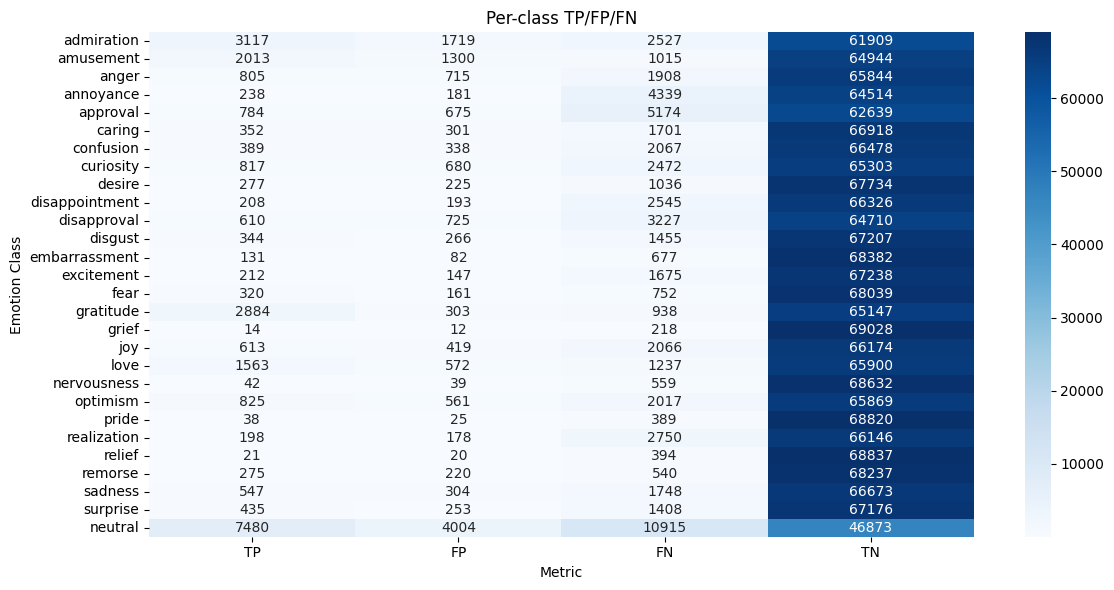

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    np.array([tp, fp, fn, tn]).T,
    annot=True,
    fmt='d',
    xticklabels=["TP", "FP", "FN", "TN"],
    yticklabels=emotion_columns,
    cmap="Blues"
)
plt.xlabel("Metric")
plt.ylabel("Emotion Class")
plt.title("Per-class TP/FP/FN")
plt.tight_layout()
plt.show()

# Results/Insights

* Strongest Strength: The model excels at classifying instances that do not belng to a specific emotion class. Therefore, the high True Negative(TN) counts across the model. This suggests the model is reliable in crossing out incorrect emotion labels.

* Key Weakness: Model struggles to correctly identify emotioons(high False Negatives) and differentiating them from one anoother(high False Positives), which shows poor precision and recall in many emotino categories

* Class imbalance: The Varying performance likely roots from the the imbalance in the dataset. Emotions with more examples end up with higher True Positive(TP) counts, while the those with fewer examples are harder for the model to learn.